#Libraries

In [ ]:
import keras as ks
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Data Cleaning

In [ ]:
# Importing Dataset
data = pd.read_csv('questionnaire.csv')
data

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727,NaN,NaN,NaN,3.0,NaN,1.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,150.0,26.0,NaN,NaN,NaN
10171,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,83729,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,155.0,135.0,NaN,195.0,42.0,NaN,NaN,NaN
10173,83730,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop SEQN Column (Interviewee ID)
data = data.drop(columns='SEQN')
# Replace 'I dont know' or 'Refused to answer' values with None
data.replace({7: None,
              9: None,
              77: None,
              99: None,
              777: None,
              999: None,
              7777: None,
              9999: None,
              77777: None,
              99999: None,
              777777: None,
              999999: None,
              55: None,
              555: None,
              5555: None,
              8: None,
              88: None}, inplace=True)

In [ ]:
# Drop NA entries from diabetes column
data = data.dropna(subset=['DIQ010'])
data['DIQ010'].describe()

count     9763.0
unique       3.0
top          2.0
freq      8841.0
Name: DIQ010, dtype: float64

In [ ]:
# Fill NA in columns with MODE of said column
data.fillna(data.mode().iloc[0], inplace=True)
data

,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,1.0,NaN,NaN,5.0,1.0,1.0,2.0,1.0,3.0,1.0,...,35.0,40.0,270.0,200.0,69.0,270.0,62.0,3.0,1.0,2.0
1,1.0,NaN,NaN,5.0,1.0,1.0,2.0,1.0,1.0,4.0,...,35.0,40.0,240.0,250.0,72.0,250.0,25.0,3.0,1.0,2.0
2,1.0,NaN,NaN,5.0,1.0,1.0,2.0,0.0,1.0,1.0,...,35.0,40.0,180.0,190.0,70.0,228.0,35.0,3.0,1.0,2.0
3,1.0,NaN,NaN,5.0,1.0,1.0,2.0,1.0,1.0,1.0,...,35.0,40.0,160.0,150.0,66.0,180.0,40.0,3.0,3.0,3.0
4,1.0,NaN,NaN,5.0,1.0,1.0,2.0,0.0,1.0,1.0,...,35.0,40.0,150.0,135.0,67.0,170.0,60.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,1.0,NaN,NaN,3.0,1.0,1.0,2.0,1.0,2.0,3.0,...,35.0,40.0,160.0,150.0,66.0,150.0,26.0,3.0,1.0,2.0
10171,1.0,NaN,NaN,5.0,1.0,1.0,2.0,1.0,1.0,1.0,...,35.0,40.0,160.0,150.0,66.0,180.0,40.0,3.0,1.0,2.0
10172,1.0,NaN,NaN,5.0,1.0,1.0,2.0,1.0,1.0,1.0,...,35.0,40.0,155.0,135.0,66.0,195.0,42.0,3.0,1.0,2.0
10173,1.0,NaN,NaN,4.0,1.0,1.0,2.0,1.0,1.0,1.0,...,35.0,40.0,160.0,150.0,66.0,180.0,40.0,3.0,1.0,2.0


In [ ]:
# Get columns where MODE is NA
columns_with_null = data.columns[data.isnull().any()].tolist()
columns_with_null

['ACD011B',
 'ACD011C',
 'CSQ120G',
 'CSQ120H',
 'CDQ009G',
 'CDQ009H',
 'MCQ240I',
 'MCQ240R',
 'PAQ724G',
 'PAQ724H',
 'PAQ724I',
 'PAQ759G',
 'PAQ759H',
 'PAQ759I',
 'SMQ665D',
 'SMQ690G',
 'SMQ690H',
 'SMQ690I',
 'SMQ690J',
 'SMQ861']

In [ ]:
# Drop columns with NA
data.dropna(axis=1, inplace=True)
data

,ACD011A,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,1.0,5.0,1.0,1.0,2.0,1.0,3.0,1.0,0.0,3.0,...,35.0,40.0,270.0,200.0,69.0,270.0,62.0,3.0,1.0,2.0
1,1.0,5.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0,...,35.0,40.0,240.0,250.0,72.0,250.0,25.0,3.0,1.0,2.0
2,1.0,5.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0,...,35.0,40.0,180.0,190.0,70.0,228.0,35.0,3.0,1.0,2.0
3,1.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0,...,35.0,40.0,160.0,150.0,66.0,180.0,40.0,3.0,3.0,3.0
4,1.0,5.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0,...,35.0,40.0,150.0,135.0,67.0,170.0,60.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,1.0,3.0,1.0,1.0,2.0,1.0,2.0,3.0,0.0,3.0,...,35.0,40.0,160.0,150.0,66.0,150.0,26.0,3.0,1.0,2.0
10171,1.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0,...,35.0,40.0,160.0,150.0,66.0,180.0,40.0,3.0,1.0,2.0
10172,1.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0,...,35.0,40.0,155.0,135.0,66.0,195.0,42.0,3.0,1.0,2.0
10173,1.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0,...,35.0,40.0,160.0,150.0,66.0,180.0,40.0,3.0,1.0,2.0


In [ ]:
# Drop questions from "Diabetes" subsection (Contained questions like: At what age were you diagnosed with diabetes)
data = data.drop(data.columns[87:139], axis=1)
data

,ACD011A,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,1.0,5.0,1.0,1.0,2.0,1.0,3.0,1.0,0.0,3.0,...,35.0,40.0,270.0,200.0,69.0,270.0,62.0,3.0,1.0,2.0
1,1.0,5.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0,...,35.0,40.0,240.0,250.0,72.0,250.0,25.0,3.0,1.0,2.0
2,1.0,5.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0,...,35.0,40.0,180.0,190.0,70.0,228.0,35.0,3.0,1.0,2.0
3,1.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0,...,35.0,40.0,160.0,150.0,66.0,180.0,40.0,3.0,3.0,3.0
4,1.0,5.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0,...,35.0,40.0,150.0,135.0,67.0,170.0,60.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,1.0,3.0,1.0,1.0,2.0,1.0,2.0,3.0,0.0,3.0,...,35.0,40.0,160.0,150.0,66.0,150.0,26.0,3.0,1.0,2.0
10171,1.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0,...,35.0,40.0,160.0,150.0,66.0,180.0,40.0,3.0,1.0,2.0
10172,1.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0,...,35.0,40.0,155.0,135.0,66.0,195.0,42.0,3.0,1.0,2.0
10173,1.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,3.0,...,35.0,40.0,160.0,150.0,66.0,180.0,40.0,3.0,1.0,2.0


In [ ]:
# Get correlation matrix
matrix = data.corr()
matrix

<ipython-input-9-ef0ae0f1c71b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr()


,ACD011A,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
ACD011A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACD040,NaN,1.000000,0.104219,-0.089304,0.039037,0.020866,-0.034400,-0.063803,0.008105,0.026151,...,NaN,NaN,0.050248,0.063463,0.095594,0.062692,0.005211,0.004794,0.038664,-0.020431
ACD110,NaN,0.104219,1.000000,0.019493,-0.010295,-0.014393,-0.019443,-0.034126,-0.011618,0.021049,...,NaN,NaN,-0.091970,-0.074245,-0.054905,-0.120517,-0.045077,-0.005398,0.047775,-0.037940
ALQ101,NaN,-0.089304,0.019493,1.000000,-0.610892,-0.036689,0.050998,-0.137174,-0.045926,0.111064,...,NaN,NaN,-0.034093,-0.115494,-0.132051,-0.043128,0.013423,0.084839,-0.132953,0.062066
ALQ110,NaN,0.039037,-0.010295,-0.610892,1.000000,0.016671,-0.262973,0.063877,0.027858,-0.068564,...,NaN,NaN,-0.006603,0.063675,0.074109,-0.004382,-0.049731,-0.052374,0.082077,-0.038316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHD140,NaN,0.062692,-0.120517,-0.043128,-0.004382,-0.000941,0.093486,0.116037,0.035022,-0.058592,...,NaN,NaN,0.718120,0.669626,0.268367,1.000000,0.073842,0.036782,-0.057642,0.026909
WHQ150,NaN,0.005211,-0.045077,0.013423,-0.049731,0.003044,-0.059992,-0.160336,-0.046757,0.114301,...,NaN,NaN,0.106939,-0.163801,0.012104,0.073842,1.000000,-0.004613,0.007229,-0.003375
WHQ030M,NaN,0.004794,-0.005398,0.084839,-0.052374,0.018547,0.094407,0.069009,0.019808,-0.047292,...,NaN,NaN,0.030852,0.010454,0.009822,0.036782,-0.004613,1.000000,-0.084083,-0.087634
WHQ500,NaN,0.038664,0.047775,-0.132953,0.082077,-0.029066,-0.147947,-0.108146,-0.031042,0.074113,...,NaN,NaN,-0.048348,-0.016382,-0.015392,-0.057642,0.007229,-0.084083,1.000000,-0.596359


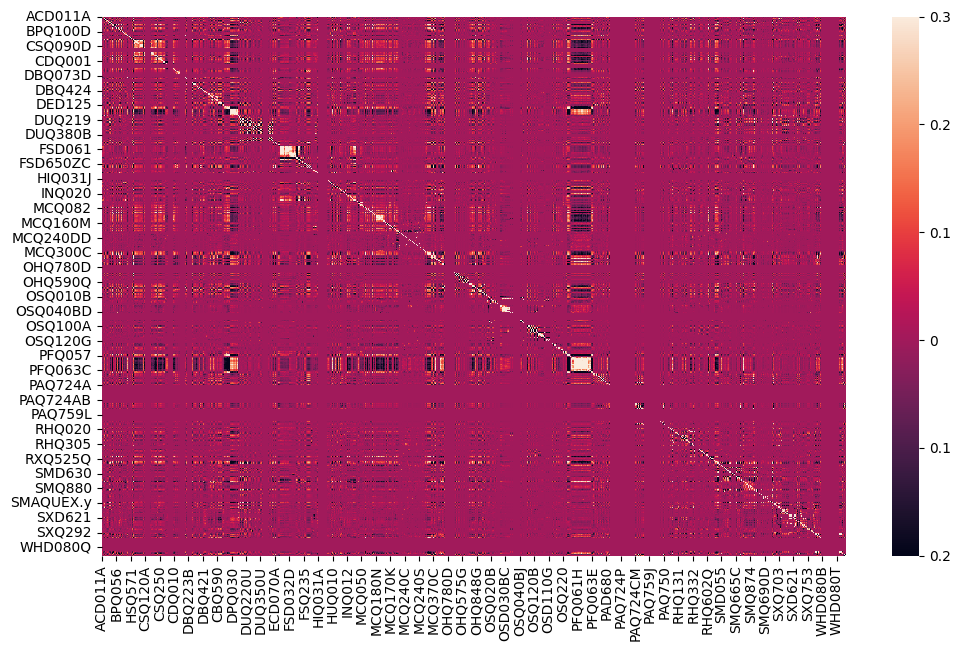

In [ ]:
# Plot correlation matrix
matrix.replace({None: 0, np.nan: 0}, inplace=True)
ticks = [0.3, 0.2, 0.1, 0, -0.1, -0.2]
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(matrix, vmin=-0.2, vmax=0.3, cbar_kws={'ticks': ticks})
ax.collections[0].colorbar.set_ticklabels([abs(t) for t in ticks])

In [ ]:
# Get correlations between all columns and Diabetes target
diabetes_matrix = matrix['DIQ010'].abs()
diabetes_matrix.sort_values(ascending=False)

DIQ010     1.000000
BPQ090D    0.288123
RXQ510     0.250236
MCQ365C    0.231354
MCQ365D    0.231300
             ...   
PAQ759K    0.000000
PAQ759L    0.000000
PAQ759M    0.000000
PAQ759N    0.000000
ACD011A    0.000000
Name: DIQ010, Length: 878, dtype: float64

In [ ]:
# Get top N correlated columns
N = 10
columns = diabetes_matrix.sort_values(ascending=False)[:(N + 1)]
columns = pd.concat([columns])
columns

DIQ010     1.000000
BPQ090D    0.288123
RXQ510     0.250236
MCQ365C    0.231354
MCQ365D    0.231300
BPQ020     0.222740
MCQ365B    0.219481
MCQ365A    0.215624
PFQ061D    0.205184
PFQ061M    0.203728
MCQ300C    0.200532
Name: DIQ010, dtype: float64

# NN Model

In [ ]:
# Target -> Diabetes
labels = data[columns.index[0]]
labels

0        1.0
1        1.0
2        1.0
3        2.0
4        2.0
        ... 
10170    2.0
10171    2.0
10172    2.0
10173    2.0
10174    2.0
Name: DIQ010, Length: 9763, dtype: float64

In [ ]:
# Features -> Top columns based on correlation
features = data[columns.index[1:]]
features

,BPQ090D,RXQ510,MCQ365C,MCQ365D,BPQ020,MCQ365B,MCQ365A,PFQ061D,PFQ061M,MCQ300C
0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
1,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0
2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...
10170,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
10171,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
10172,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
10173,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0


In [ ]:
# Verifying no NA
features.isna().sum()

BPQ090D    0
RXQ510     0
MCQ365C    0
MCQ365D    0
BPQ020     0
MCQ365B    0
MCQ365A    0
PFQ061D    0
PFQ061M    0
MCQ300C    0
dtype: int64

In [ ]:
# Preprocessing features
featuresScale = preprocessing.minmax_scale(features)
print(type(featuresScale))
featuresScale[0:5]

<class 'numpy.ndarray'>


array([[0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.75, 1.  ]])

In [ ]:
# Encoding label
labels_onehot_dataframe = pd.get_dummies(labels, prefix='DIQ010')
one_hot = np.array(labels_onehot_dataframe)

In [ ]:
# Splitting into training and testing
train_feats, test_feats, train_lab, test_lab = train_test_split(featuresScale, one_hot, test_size=0.33, random_state=42)
print(train_feats.shape)
print(train_lab.shape)
print()
print(test_feats.shape)
print(test_lab.shape)

(6541, 10)
(6541, 3)

(3222, 10)
(3222, 3)


In [ ]:
# Check shape of training features and labels
print('Training Data - feature')
print(train_feats.shape)
print(train_feats[:5,:])

print('Training Data - Label')
print(train_lab.shape)
print(train_lab[:5,:])

Training Data - feature
(6541, 10)
[[1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]]
Training Data - Label
(6541, 3)
[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [ ]:
# Check shape of testing features and labels
print(test_feats.shape)
print('Testing Data - feature')
print(test_feats.shape)
print(test_feats[:5,:])

print('Testing Data - Label')
print(test_lab.shape)
print(test_lab[:5,:])

(3222, 10)
Testing Data - feature
(3222, 10)
[[1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]]
Testing Data - Label
(3222, 3)
[[0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [ ]:
feat_shape = train_feats.shape[1]
print(feat_shape)
hidden_nodes = 5
out_shape = train_lab.shape[1]
print(out_shape)

10
3


In [ ]:
model = Sequential()
model.add(Dense(hidden_nodes, activation='relu', input_dim=feat_shape))
model.add(Dense(out_shape, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(train_feats.shape)
print(train_lab.shape)

epochs = 1000

hist = model.fit(train_feats, train_lab, epochs=epochs, batch_size=128, verbose=1)

(6541, 10)
(6541, 3)
Epoch 1/1000
52/52 [==============================] - 1s 2ms/step - loss: 0.9955
Epoch 2/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.6287
Epoch 3/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.4527
Epoch 4/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.3696
Epoch 5/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.3328
Epoch 6/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.3161
Epoch 7/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 8/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 9/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.2947
Epoch 10/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 11/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 12/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.2824
Epoc

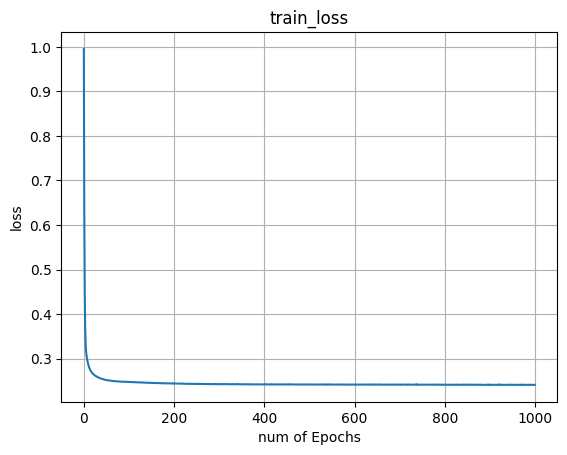

In [ ]:
train_loss = hist.history['loss']
xc = range(epochs)
plt.plot(xc, train_loss)

plt.figure(1,figsize=(7,5))
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.style.use(['ggplot'])

In [ ]:
for layerNum, layer in enumerate(model.layers):
    print("Layer Number = ", layerNum)
    ###########################################
    print("Weights Values =")
    weights = layer.get_weights()[0]
    print(weights)
    ############################################
    print("Bias Values =")
    biases = layer.get_weights()[1]
    print(biases)
    print("================================")

Layer Number =  0
Weights Values =
[[-0.27161407  0.66355413  1.2571831  -0.45516247  0.28581238]
 [-0.40174112 -0.28132832  0.5531885  -0.7730416   0.29076198]
 [ 0.67119884 -0.10056224  0.40930843  0.3240751  -0.04767894]
 [-0.15998775 -0.09911679  0.07217411 -0.24813756  0.29869208]
 [-0.10062567  0.17398253 -0.24292536 -0.18481249  1.4689648 ]
 [ 0.20637101 -0.21734916  0.30088893 -0.04883793  0.04698703]
 [ 0.05603044 -0.2674708  -0.21193995 -0.06036595  0.79773444]
 [-0.64706886  0.7504828  -0.6078369   0.6497276  -0.55317324]
 [ 0.84698665  1.3386748  -0.37289637  1.8607762  -0.0220054 ]
 [-1.0250021   0.10142355 -0.01569778 -0.08299941  0.40411526]]
Bias Values =
[1.0223099  0.10975384 0.23571177 0.7603508  0.2859279 ]
Layer Number =  1
Weights Values =
[[ 0.03633402 -1.3294268   0.0507502 ]
 [ 1.0323836  -0.5960241   0.60576427]
 [-0.51406664  1.0938101   0.32741964]
 [-0.6038546   1.1538448  -0.67177004]
 [-0.33442855  0.45193902 -0.33126977]]
Bias Values =
[ 0.8174493  -0.23

In [ ]:
print(model.metrics_names)
score = model.evaluate(test_feats, test_lab, batch_size=128,)
print(score)

['loss']
26/26 [==============================] - 0s 1ms/step - loss: 0.2464
0.24643312394618988


In [ ]:
pred = model.predict(test_feats)
predClass = np.argmax(pred, axis=1)
print(predClass)

101/101 [==============================] - 0s 1ms/step
[1 1 1 ... 1 1 1]


In [ ]:
observed = np.argmax(test_lab, axis=1)
print(observed)

[1 0 1 ... 0 1 1]


In [ ]:
cm = confusion_matrix(observed, predClass)
print(cm)
print('Accuracy Score :', accuracy_score(observed, predClass))

[[  63  188    0]
 [  50 2863    0]
 [  11   47    0]]
Accuracy Score : 0.9081315952824333


In [ ]:
ppt = [[2.,	2.,	1.,	1.,	2.,	1.,	1.,	1.,	1.,	1.,]]
np.argmax(model.predict(ppt))

1/1 [==============================] - 0s 127ms/step


1

# Log Regression

In [ ]:
new_df = data[columns.index]
new_df

,DIQ010,BPQ090D,RXQ510,MCQ365C,MCQ365D,BPQ020,MCQ365B,MCQ365A,PFQ061D,PFQ061M,MCQ300C
0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0
2,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
4,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
10170,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
10171,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
10172,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
10173,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0


In [ ]:
Y = new_df.iloc[:, :1]
print(type(Y))
Y

<class 'pandas.core.frame.DataFrame'>


,DIQ010
0,1.0
1,1.0
2,1.0
3,2.0
4,2.0
...,...
10170,2.0
10171,2.0
10172,2.0
10173,2.0


In [ ]:
X = new_df.iloc[:, 1:]
print(type(X))
X

<class 'pandas.core.frame.DataFrame'>


,BPQ090D,RXQ510,MCQ365C,MCQ365D,BPQ020,MCQ365B,MCQ365A,PFQ061D,PFQ061M,MCQ300C
0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
1,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0
2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...
10170,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
10171,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
10172,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
10173,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0


In [ ]:
# Split data into training + testing data
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, random_state=42, test_size= 0.33)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6541, 10)
(6541, 1)
(3222, 10)
(3222, 1)


In [ ]:
print("Before splitting:")
print("X.shape:", X.shape)
print("Y.shape:", Y.shape)

Before splitting:
X.shape: (9763, 10)
Y.shape: (9763, 1)


In [ ]:
logreg= LogisticRegression()
logreg.fit(X_train, Y_train)
print('logreg.intercept:', logreg.intercept_)
print('logreg.coef:', logreg.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


logreg.intercept: [ 3.20762791 -3.26280007  0.05517216]
logreg.coef: [[-6.83844672e-01 -4.31991675e-01 -2.00441257e-01 -1.36879081e-01
  -8.82026156e-02 -1.86550689e-01 -2.67891335e-01  8.16713635e-02
   1.44527695e-01 -4.42329158e-01]
 [ 5.43154884e-01  4.31885956e-01  1.14096842e-01  2.50587605e-01
   5.26602469e-01  2.49690649e-01  3.55832689e-01 -1.00751435e-01
  -3.45200625e-02  9.06833510e-01]
 [ 1.40689788e-01  1.05718983e-04  8.63444154e-02 -1.13708524e-01
  -4.38399854e-01 -6.31399598e-02 -8.79413544e-02  1.90800715e-02
  -1.10007632e-01 -4.64504352e-01]]


In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([2., 2., 2., ..., 2., 2., 2.])

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9103041589075108
Confusion Matrix:
[[  82  169    0]
 [  62 2851    0]
 [  14   44    0]]


In [ ]:
ppt_df = pd.DataFrame([{'BPQ090D': 1.,'RXQ510': 1.,'MCQ365C': 2.,'MCQ365D': 1.,'BPQ020': 2.,'MCQ365B': 1.,'MCQ365A': 1.,'PFQ061D': 1.,'PFQ061M': 1.,'MCQ300C': 1.}])
ppt_df
# logreg.predict(ppt_df)

,BPQ090D,RXQ510,MCQ365C,MCQ365D,BPQ020,MCQ365B,MCQ365A,PFQ061D,PFQ061M,MCQ300C
0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
